In [96]:
config='001iORCA025'
varname='par'


In [97]:
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy.ma as ma
import numpy as np
import cmocean

%matplotlib inline

In [111]:
if varname == 'currents':
    filet=xr.open_dataset('/summer/meom/MODEL_SET/Seamless/ENS39/001iORCA025_5d_20190101_20191231_grid_T_merg.nc')
    fileu=xr.open_dataset('/summer/meom/MODEL_SET/Seamless/ENS39/001iORCA025_5d_20190101_20191231_grid_U_merg.nc')
    filev=xr.open_dataset('/summer/meom/MODEL_SET/Seamless/ENS39/001iORCA025_5d_20190101_20191231_grid_V_merg.nc')
    usurf=fileu['uo'][:,0,:,:]
    vsurf=filev['vo'][:,0,:,:]
    var=usurf*usurf+vsurf*vsurf
    navlon=filet['nav_lon']
    navlat=filet['nav_lat']
    cmap=cmocean.cm.amp
    vmin=0
    vmax=0.75
    unit='m/s'

if varname == 'temp':
    filet=xr.open_dataset('/summer/meom/MODEL_SET/Seamless/ENS39/001iORCA025_5d_20190101_20191231_grid_T_merg.nc')
    var=filet['thetao'][:,0,:,:]
    navlon=filet['nav_lon']
    navlat=filet['nav_lat']
    cmap=cmocean.cm.thermal
    vmin=0
    vmax=35
    unit='°C'

if varname == 'chl':
    filet=xr.open_dataset('/summer/meom/MODEL_SET/Seamless/ENS39/001iORCA025_5d_20190101_20191231_ptrc_T_merg.nc')
    var=filet['CHL'][:,0,:,:]
    navlon=filet['nav_lon']
    navlat=filet['nav_lat']
    cmap=cmocean.cm.algae
    vmin=0
    vmax=1
    unit='mg/m3'

if varname == 'no3':
    filet=xr.open_dataset('/summer/meom/MODEL_SET/Seamless/ENS39/001iORCA025_5d_20190101_20191231_ptrc_T_merg.nc')
    var=filet['NO3'][:,0,:,:]
    navlon=filet['nav_lon']
    navlat=filet['nav_lat']
    cmap=cmocean.cm.matter
    vmin=0
    vmax=25
    unit='mmol/m3'

if varname == 'ph':
    filet=xr.open_dataset('/summer/meom/MODEL_SET/Seamless/ENS39/001iORCA025_5d_20190101_20191231_diad_T_merg.nc')
    var=filet['PH'][:,0,:,:]
    navlon=filet['nav_lon']
    navlat=filet['nav_lat']
    cmap=cmocean.cm.phase
    vmin=7.5
    vmax=8.5
    unit=''

if varname == 'par':
    filet=xr.open_dataset('/summer/meom/MODEL_SET/Seamless/ENS39/001iORCA025_5d_20190101_20191231_diad_T_merg.nc')
    var=filet['PAR'][:,0,:,:]
    navlon=filet['nav_lon']
    navlat=filet['nav_lat']
    cmap=cmocean.cm.deep_r
    vmin=0
    vmax=60
    unit='W/m2'

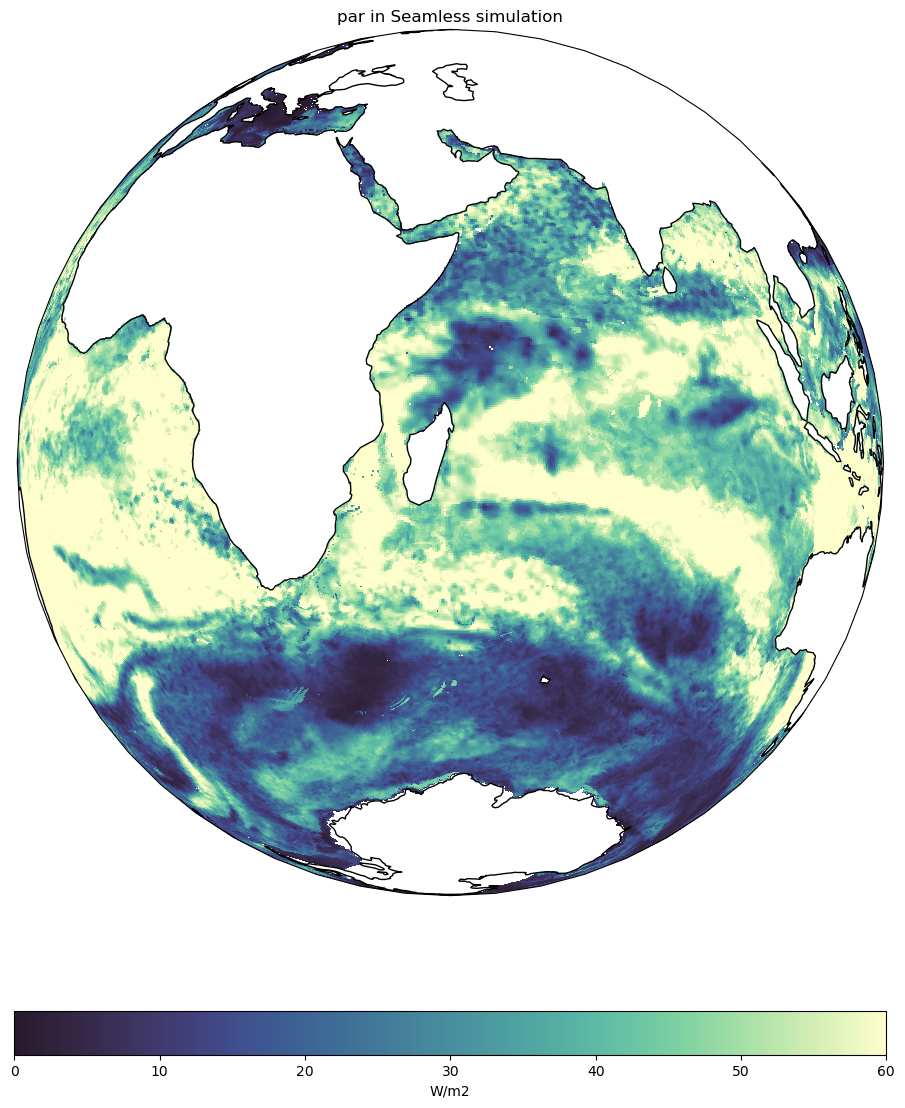

In [114]:
fig = plt.figure(figsize=(15,15))

projection=ccrs.Orthographic(central_latitude=-20, central_longitude=50)
ax = fig.add_subplot(111,projection=projection)
pcolor=ax.pcolormesh(navlon,navlat,var[10],transform=ccrs.PlateCarree(),cmap=cmap,vmin=vmin,vmax=vmax)
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='grey',
                                        facecolor='grey')
#ax.add_feature(land_50m)
ax.coastlines()
#gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
#                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
#gl.xlocator = mticker.FixedLocator(np.arange(-180,180,10))
#gl.ylocator = mticker.FixedLocator(np.arange(-90,90,10))
#gl.xformatter = LONGITUDE_FORMATTER
#gl.yformatter = LATITUDE_FORMATTER
#gl.xlabel_style = {'size': 15, 'color': 'gray'}
#gl.ylabel_style = {'size': 15, 'color': 'gray'}
#gl.ylabels_right = False
#gl.xlabels_top = False
#fig.subplots_adjust(right=0.8)
cbar = plt.colorbar(pcolor,orientation='horizontal',shrink=0.75, pad=0.1,label=unit)

plt.title(varname+' in Seamless simulation')
plt.savefig('Seamless_'+varname+'.png', bbox_inches='tight')

/bettik/alberta/micromamba/envs/plots/lib/python3.11/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '


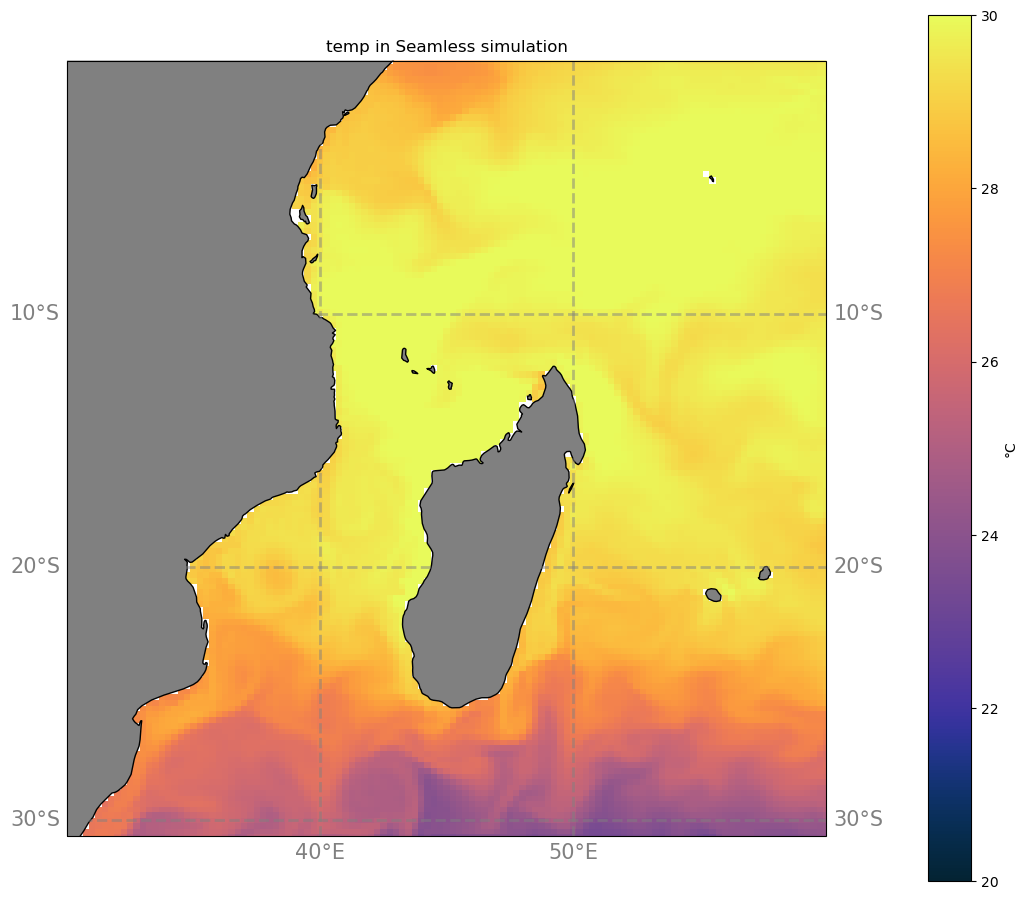

In [36]:
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(111,projection=ccrs.PlateCarree(central_longitude=-20))
ax.autoscale(tight=True)
pcolor=ax.pcolormesh(navlon,navlat,var[10],transform=ccrs.PlateCarree(),cmap=cmap,vmin=vmin,vmax=vmax)
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='black',
                                        facecolor='grey')
ax.add_feature(land_50m)
#ax.coastlines()
ax.set_extent([30, 60, -30, 0])
gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlocator = mticker.FixedLocator(np.arange(-90,90,10))
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,10))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.ylabel_style = {'size': 15, 'color': 'gray'}
#gl.ylabels_right = False
gl.xlabels_top = False
fig.subplots_adjust(right=0.8)
cbar = plt.colorbar(pcolor,orientation='vertical',shrink=0.75, pad=0.1,label=unit)
plt.title(varname+' in Seamless simulation')
plt.savefig('Seamless_'+varname+'.png', bbox_inches='tight')